In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data            # Flattened images
y = lfw_people.target
target_names = lfw_people.target_names
image_shape = lfw_people.images[0].shape

print("Image data shape:", X.shape)
print("Classes:", target_names)


Image data shape: (1288, 1850)
Classes: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


There are 1288 images (such that there are at least 70 images per person/class).

In [4]:
lfw_people.images.shape  # should be (1288, height, width)

(1288, 50, 37)

In [3]:
y.shape

(1288,)

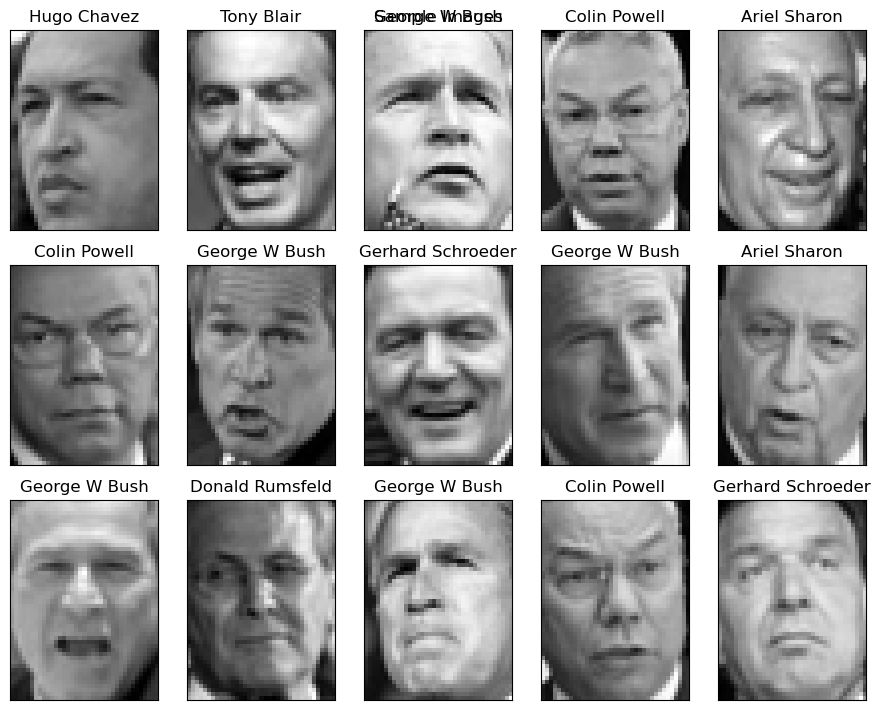

In [2]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.tight_layout()

titles = [target_names[y[i]] for i in range(15)]
plot_gallery(X, titles, *image_shape)
plt.suptitle("Sample Images")
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)


In [ ]:
n_components = 157

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
pca.fit(X_train)

eigenfaces = pca.components_.reshape((n_components, *image_shape))
print("Shape of eigenfaces:", eigenfaces.shape)

# Project images to PCA space
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


Shape of eigenfaces: (150, 50, 37)


In [14]:
X_train_pca.shape, X_test_pca.shape

((966, 150), (322, 150))

In [ ]:
pca.components_.shape # each principle componenent is suppposed to be (d, d) but is (r, d) here
# eigen vector of the covariance matrix

(150, 1850)

In [ ]:
Sigma = np.diag(pca.singular_values_)
Sigma.shape  # is (r,r)

(150, 150)

Left Singular Vectors are not stored.

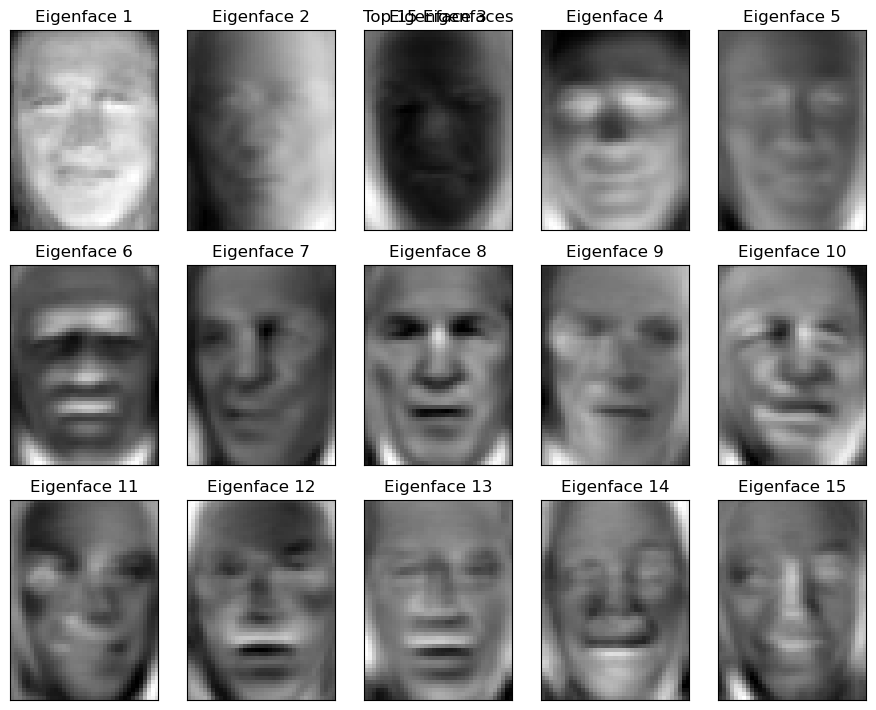

In [7]:
plot_gallery(eigenfaces, [f"Eigenface {i+1}" for i in range(15)],
             *image_shape, n_row=3, n_col=5)
plt.suptitle("Top 15 Eigenfaces")
plt.show()


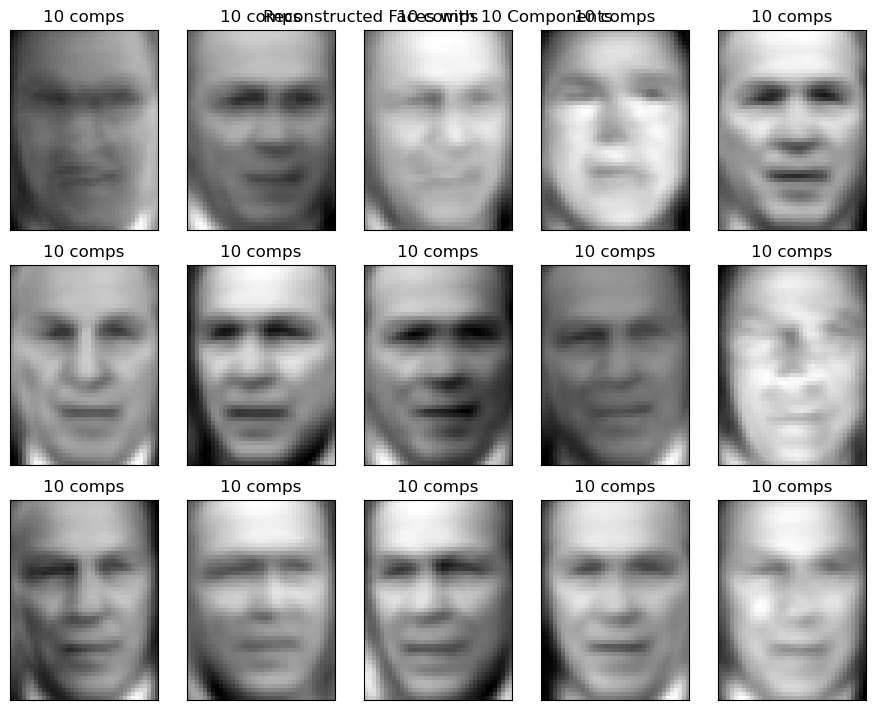

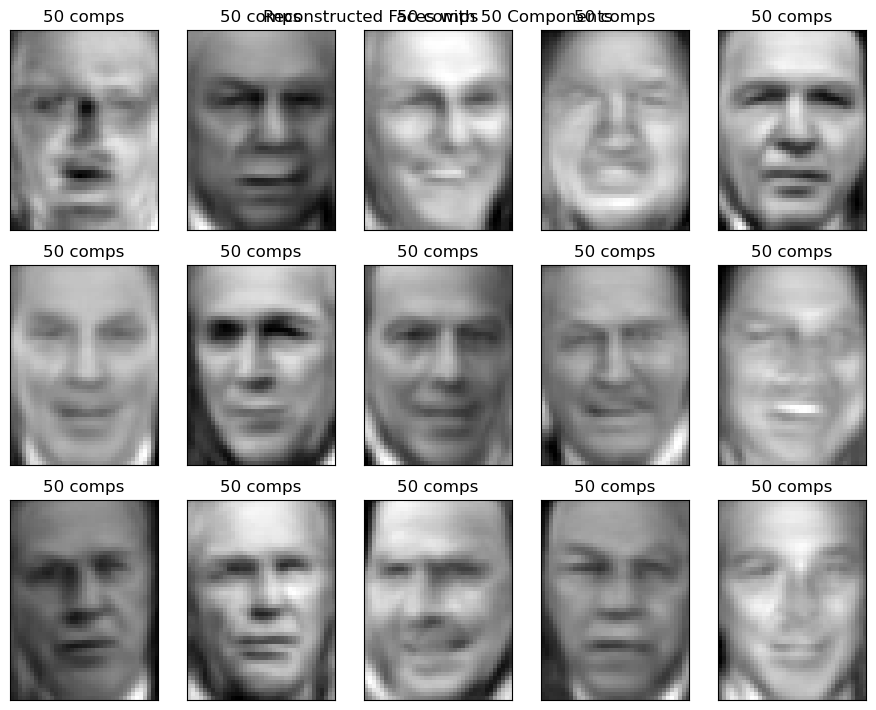

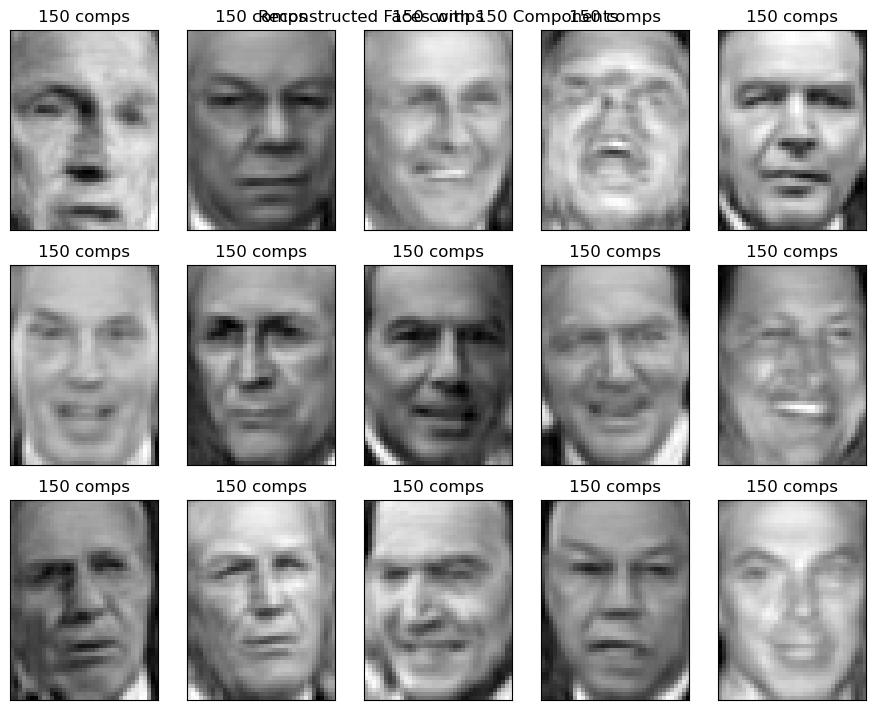

In [8]:
def reconstruct_and_plot(n_components_list):
    for n in n_components_list:
        pca = PCA(n_components=n, svd_solver='randomized', whiten=True)
        X_train_pca = pca.fit_transform(X_train)
        X_projected = pca.inverse_transform(X_train_pca)

        plot_gallery(X_projected[:15], [f"{n} comps"]*15,
                     *image_shape, n_row=3, n_col=5)
        plt.suptitle(f"Reconstructed Faces with {n} Components")
        plt.show()

reconstruct_and_plot([10, 50, 150])


In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca_full = PCA(svd_solver='randomized', whiten=True).fit(X_train)

explained_variance_ratio = pca_full.explained_variance_ratio_

cumulative_variance = np.cumsum(explained_variance_ratio)


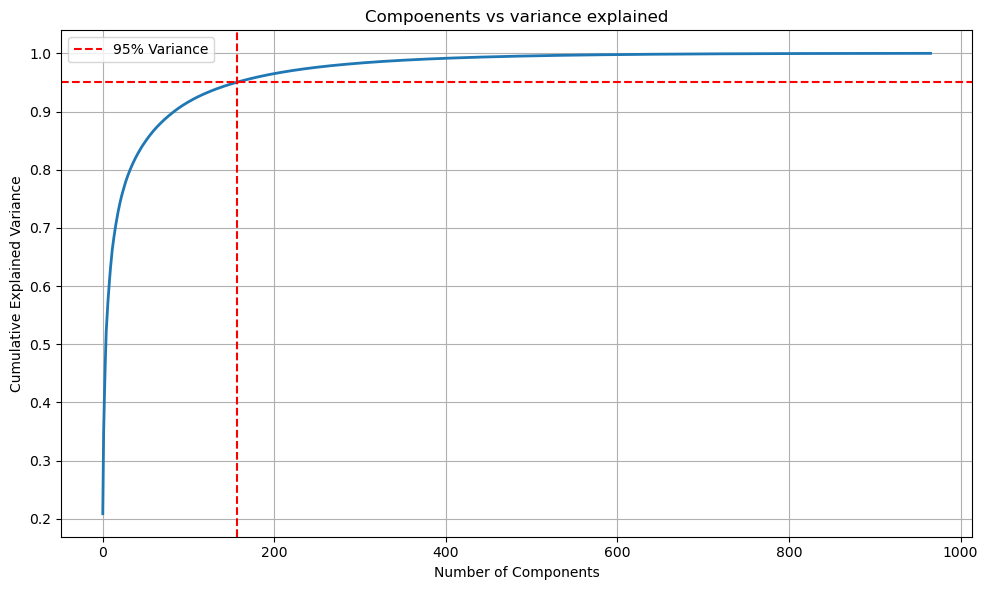

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, linewidth=2)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95), color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Compoenents vs variance explained')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
n_95 = np.argmax(cumulative_variance >= 0.95) + 1 
print(f"Number of components to retain 95% variance: {n_95}")

Number of components to retain 95% variance: 157
